## HRUDAYANJALI
## Exploratory Data Analysis - Sports

- Problem Statement: Perform Exploratory Data Analysis on 'Indian Premiere League'

- As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

- Suggest teams or players a company should endorse for its products.

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
deliveries=pd.read_csv("C:\\Users\\sairahul\\Downloads\\Indian Premier League\\deliveries.csv")
matches=pd.read_csv("C:\\Users\\sairahul\\Downloads\\Indian Premier League\\matches.csv")

In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
m=matches[matches.season==2017]
m.groupby(['winner'])['winner'].count()

winner
Delhi Daredevils                6
Gujarat Lions                   4
Kings XI Punjab                 7
Kolkata Knight Riders           9
Mumbai Indians                 12
Rising Pune Supergiant         10
Royal Challengers Bangalore     3
Sunrisers Hyderabad             8
Name: winner, dtype: int64

In [9]:
m=matches[['id','season','winner']]
all_data=deliveries.merge(m,how='inner',left_on='match_id',right_on='id')
all_data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,1,0,1,NaN,NaN,NaN,11415,2019,Mumbai Indians
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,2,0,2,NaN,NaN,NaN,11415,2019,Mumbai Indians
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,1,0,1,SR Watson,run out,KH Pandya,11415,2019,Mumbai Indians
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,2,0,2,NaN,NaN,NaN,11415,2019,Mumbai Indians


### ANALYSING BATSMEN AND FINDING SUCCESSFUL BATSMEN

In [10]:
#Finding runs scored by batsman
rs=all_data.groupby(['match_id','season','inning','batting_team','batsman']).agg({'ball': 'count','batsman_runs':'sum'})
rs.columns=['Number_of_balls_faced','runs_scored']
rs=rs.reset_index()
rs['strike_rate']=(rs['runs_scored']/rs['Number_of_balls_faced'])*100
rs

,match_id,season,inning,batting_team,batsman,Number_of_balls_faced,runs_scored,strike_rate
0,1,2017,1,Sunrisers Hyderabad,BCJ Cutting,6,16,266.666667
1,1,2017,1,Sunrisers Hyderabad,DA Warner,9,14,155.555556
2,1,2017,1,Sunrisers Hyderabad,DJ Hooda,12,16,133.333333
3,1,2017,1,Sunrisers Hyderabad,MC Henriques,37,52,140.540541
4,1,2017,1,Sunrisers Hyderabad,S Dhawan,31,40,129.032258
...,...,...,...,...,...,...,...,...
11330,11415,2019,2,Chennai Super Kings,MS Dhoni,8,2,25.000000
11331,11415,2019,2,Chennai Super Kings,RA Jadeja,5,9,180.000000
11332,11415,2019,2,Chennai Super Kings,SK Raina,15,9,60.000000
11333,11415,2019,2,Chennai Super Kings,SN Thakur,2,2,100.000000


In [11]:
#season wise scores of player
rs_seasonwise=rs.groupby(['season','batsman'])['Number_of_balls_faced','runs_scored'].sum().reset_index().sort_values(by='runs_scored',ascending=False)

<ipython-input-11-1e01138f886b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rs_seasonwise=rs.groupby(['season','batsman'])['Number_of_balls_faced','runs_scored'].sum().reset_index().sort_values(by='runs_scored',ascending=False)


In [12]:
#Every season top scorer
ts=rs.groupby(['season'])['runs_scored'].max().reset_index(name='Top_score').sort_values(by='season')
tb=ts.merge(rs,how='inner',left_on=['season','Top_score'],right_on=['season','runs_scored'])
tb[['season','batting_team','batsman','Number_of_balls_faced','runs_scored']]

,season,batting_team,batsman,Number_of_balls_faced,runs_scored
0,2008,Kolkata Knight Riders,BB McCullum,77,158
1,2009,Royal Challengers Bangalore,MK Pandey,74,114
2,2010,Chennai Super Kings,M Vijay,57,127
3,2011,Kings XI Punjab,PC Valthaty,64,120
4,2012,Royal Challengers Bangalore,CH Gayle,62,128
5,2013,Royal Challengers Bangalore,CH Gayle,69,175
6,2014,Kings XI Punjab,V Sehwag,62,122
7,2015,Royal Challengers Bangalore,AB de Villiers,61,133
8,2016,Royal Challengers Bangalore,AB de Villiers,53,129
9,2017,Sunrisers Hyderabad,DA Warner,60,126


In [13]:
#Total Number of runs scored
total=rs.groupby(['batsman']).agg({'Number_of_balls_faced': 'sum','runs_scored':'sum'})
total.columns=['Number_of_balls_faced','Total Runs Scored']
total=total.reset_index()
total=total.sort_values(by='Total Runs Scored',ascending=False)
total.head(10)
total['strike_rate']=(total['Total Runs Scored']/total['Number_of_balls_faced'])*100
total.head(10)
total.set_index('batsman',inplace=True)

In [14]:
# Number of Half centuries in all seasons
hc=rs[rs.runs_scored>=50]
nhc=hc.groupby(['batsman'])['runs_scored'].count().reset_index(name='Number of Half centuries').sort_values(by='Number of Half centuries',ascending=False)
nhc.head(10)
nhc.set_index('batsman',inplace=True)

In [66]:
#Number of centuries in all seasons
cen=rs[rs.runs_scored>=100]
nc=cen.groupby(['batsman'])['runs_scored'].count().reset_index(name='Number of centuries').sort_values(by='Number of centuries',ascending=False)
nc.head(10)
nc.set_index('batsman',inplace=True)

In [16]:
#Highest score of a player
hs=rs.groupby(['batsman'])['runs_scored'].max().reset_index(name='Highest Score')
hs.set_index('batsman',inplace=True)

In [17]:
#Average score of a player
asc=rs.groupby(['batsman'])['runs_scored'].mean().reset_index(name='Average Score')
asc.set_index('batsman',inplace=True)

In [18]:
#Number of times a batsman received player of match title
pom=matches.groupby(['player_of_match'])['player_of_match'].count().reset_index(name='Number of player of match titles').sort_values(by='Number of player of match titles',ascending=False)
pom.head(10)
pom.set_index('player_of_match',inplace=True)

In [19]:
#Number of times a batsman played in super over
so=all_data[all_data['is_super_over']==1]
so[['is_super_over','batsman','batsman_runs','batting_team']]
nso=so.groupby(['batsman']).agg({'batsman' : 'count','batsman_runs' : 'sum'})
nso.columns=['Number of times played in super over','Number of runs scored in super over']
nso=nso.reset_index()
nso=nso.sort_values(by=['Number of times played in super over','Number of runs scored in super over'],ascending=False)
nso.head(20)
nso.set_index('batsman',inplace=True)

In [20]:
#Number of games played
gp=deliveries.groupby(['match_id','batting_team','batsman'])['match_id'].count().reset_index(name='count')
ngp=gp.groupby(['batsman'])['match_id'].count().reset_index(name='Number of matches played').sort_values(by='Number of matches played')
ngp.set_index('batsman',inplace=True)

In [21]:
#Number of 4s
num_4=deliveries[['match_id','batsman','batsman_runs']][(deliveries.batsman_runs==4)]
num_4=num_4.groupby(['batsman'])['batsman_runs'].count().reset_index(name='Number of 4s').sort_values(by='Number of 4s')
num_4.set_index('batsman',inplace=True)

In [22]:
#Number of 6s
num_6=deliveries[['match_id','batsman','batsman_runs']][(deliveries.batsman_runs==6)]
num_6=num_6.groupby(['batsman'])['batsman_runs'].count().reset_index(name='Number of 6s').sort_values(by='Number of 6s')
num_6.set_index('batsman',inplace=True)

## Batsman Data

In [181]:
#a=gp.merge(total,how='inner',on='batsman')
dfs=[total,nc,nhc,hs,asc,num_4,num_6]
bd = ngp.join(dfs,how='left')
bd=bd.join(pom,how='left')
bd=bd.join(nso,how='left').fillna(0)
bd=bd.sort_values(by=['Total Runs Scored'],ascending=False)
bd.head(20)

,Number of matches played,Number_of_balls_faced,Total Runs Scored,strike_rate,Number of centuries,Number of Half centuries,Highest Score,Average Score,Number of 4s,Number of 6s,Number of player of match titles,Number of times played in super over,Number of runs scored in super over
batsman,,,,,,,,,,,,,
V Kohli,169,4211,5434,129.042983,5.0,42.0,113,31.964706,482.0,191.0,12.0,2.0,5.0
SK Raina,189,4044,5415,133.902077,1.0,39.0,100,28.500000,495.0,195.0,14.0,3.0,8.0
RG Sharma,182,3816,4914,128.773585,1.0,37.0,109,27.000000,431.0,194.0,17.0,0.0,0.0
DA Warner,126,3398,4741,139.523249,4.0,48.0,126,37.330709,459.0,181.0,17.0,1.0,0.0
S Dhawan,158,3776,4632,122.669492,0.0,37.0,98,29.316456,526.0,96.0,6.0,0.0,0.0
CH Gayle,124,3131,4560,145.640370,7.0,34.0,175,35.905512,376.0,327.0,21.0,12.0,25.0
MS Dhoni,170,3318,4477,134.930681,0.0,23.0,89,26.335294,297.0,207.0,17.0,0.0,0.0
RV Uthappa,170,3492,4446,127.319588,0.0,24.0,87,26.000000,436.0,156.0,7.0,0.0,0.0
AB de Villiers,142,2977,4428,148.740343,3.0,36.0,133,30.965035,357.0,214.0,20.0,4.0,13.0


In [183]:
bd=bd.reset_index()
bd

,batsman,Number of matches played,Number_of_balls_faced,Total Runs Scored,strike_rate,Number of centuries,Number of Half centuries,Highest Score,Average Score,Number of 4s,Number of 6s,Number of player of match titles,Number of times played in super over,Number of runs scored in super over
0,V Kohli,169,4211,5434,129.042983,5.0,42.0,113,31.964706,482.0,191.0,12.0,2.0,5.0
1,SK Raina,189,4044,5415,133.902077,1.0,39.0,100,28.500000,495.0,195.0,14.0,3.0,8.0
2,RG Sharma,182,3816,4914,128.773585,1.0,37.0,109,27.000000,431.0,194.0,17.0,0.0,0.0
3,DA Warner,126,3398,4741,139.523249,4.0,48.0,126,37.330709,459.0,181.0,17.0,1.0,0.0
4,S Dhawan,158,3776,4632,122.669492,0.0,37.0,98,29.316456,526.0,96.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,S Lamichhane,1,1,0,0.000000,0.0,0.0,0,0.000000,0.0,0.0,0.0,0.0,0.0
512,L Ablish,1,2,0,0.000000,0.0,0.0,0,0.000000,0.0,0.0,0.0,0.0,0.0
513,Sunny Gupta,1,1,0,0.000000,0.0,0.0,0,0.000000,0.0,0.0,0.0,0.0,0.0
514,S Ladda,2,10,0,0.000000,0.0,0.0,0,0.000000,0.0,0.0,0.0,0.0,0.0


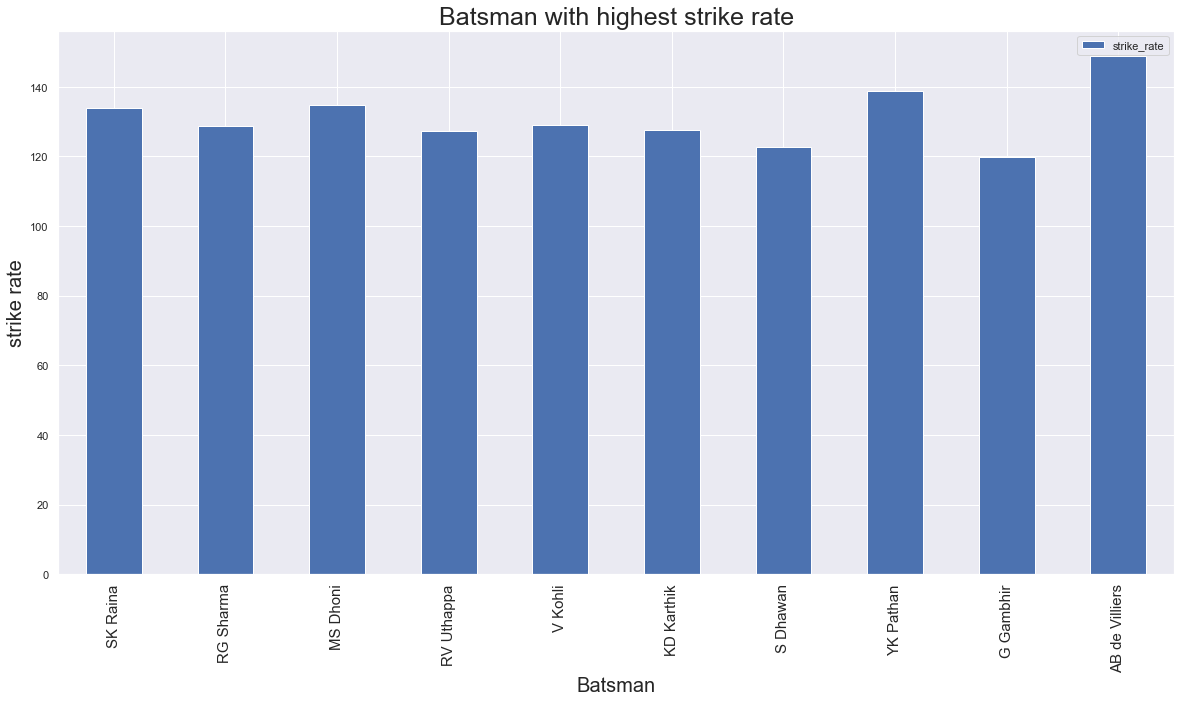

In [180]:
bd.sort_values(by=['Number of matches played','strike_rate'],ascending=False).head(10).plot(x='batsman',y='strike_rate',kind='bar',figsize=(20,10))
plt.xlabel('Batsman',fontsize=20)
plt.ylabel('strike rate',fontsize=20)
plt.title('Batsman with highest strike rate',fontsize=25)
plt.xticks(size=15)
plt.show()

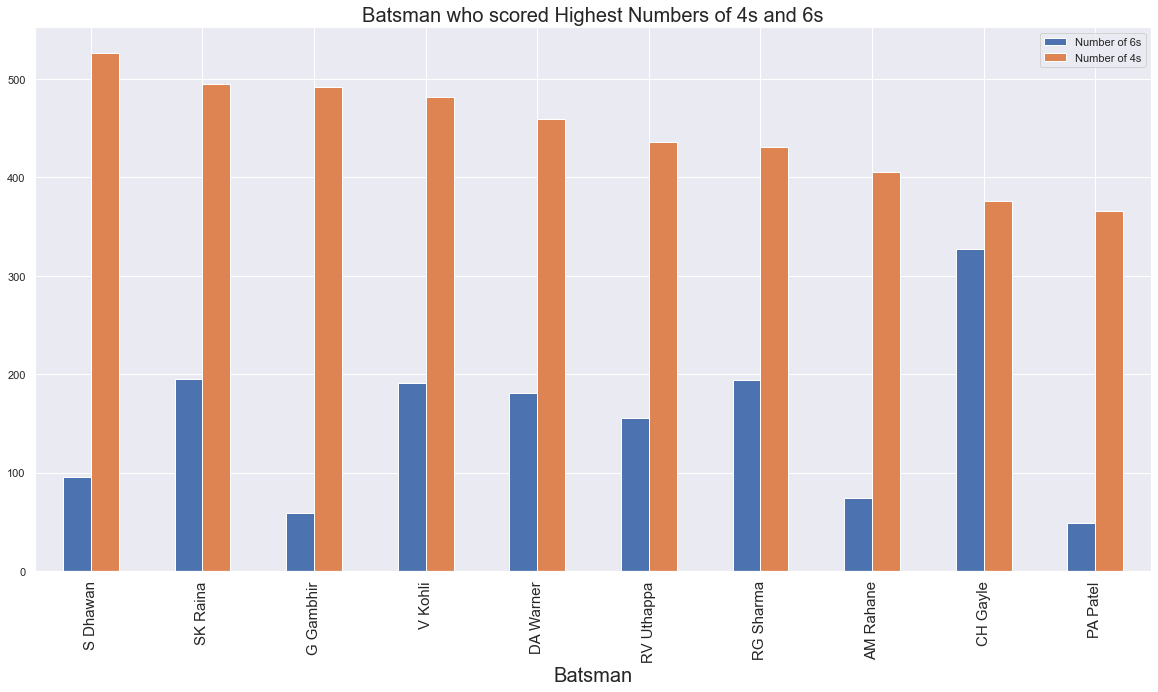

In [123]:
boundaries=bd[['batsman','Number of 4s','Number of 6s']].sort_values(by=['Number of 4s','Number of 6s'],ascending=False).head(10)
ax=boundaries.plot(x='batsman',y=['Number of 6s','Number of 4s'],kind='bar',figsize=(20,10))
ax.set_xlabel('Batsman',fontsize=20)
ax.set_title('Batsman who scored Highest Numbers of 4s and 6s',fontsize=20)
ax.tick_params(axis='x',labelsize=15)

- CH Gayle hit highest number of sixes in the span of 2008-2019 IPL tournament.
- S Dhawan hit hihest number of fours in ipl seasons 2008-2019.

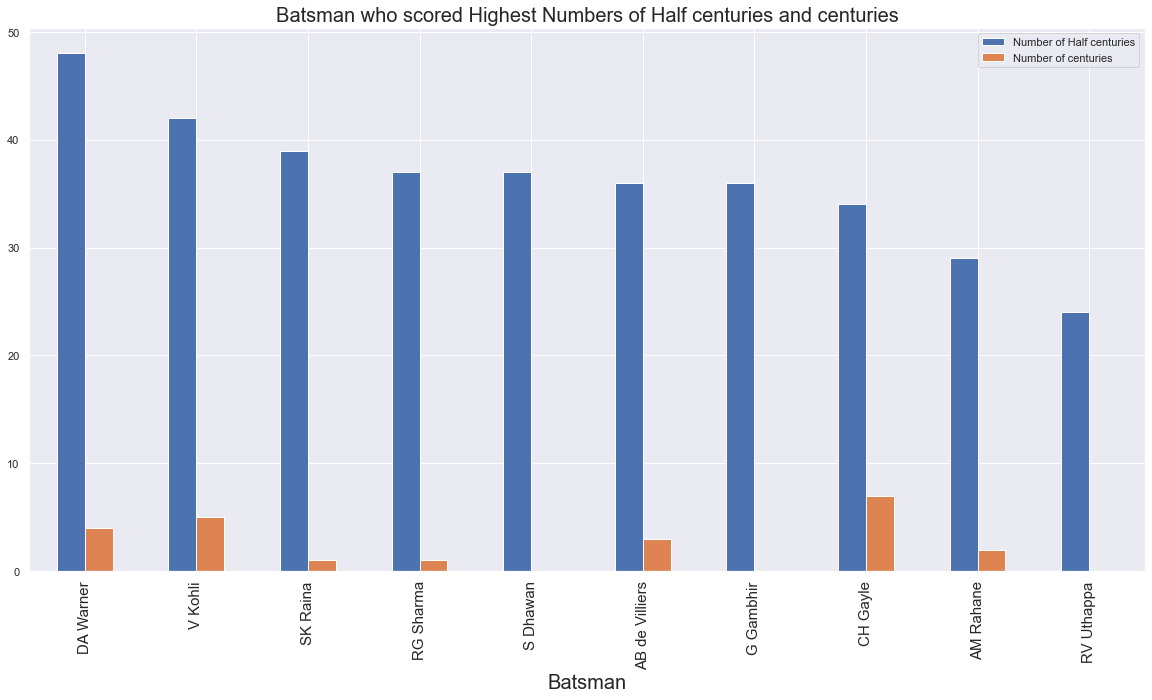

In [185]:
centuries=bd[['batsman','Number of centuries','Number of Half centuries']].sort_values(by=['Number of Half centuries','Number of centuries'],ascending=False).head(10)
ax=centuries.plot(x='batsman',y=['Number of Half centuries','Number of centuries'],kind='bar',figsize=(20,10))
ax.set_xlabel('Batsman',fontsize=20)
ax.set_title('Batsman who scored Highest Numbers of Half centuries and centuries',fontsize=20)
ax.tick_params(axis='x',labelsize=15)

C:\Users\sairahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


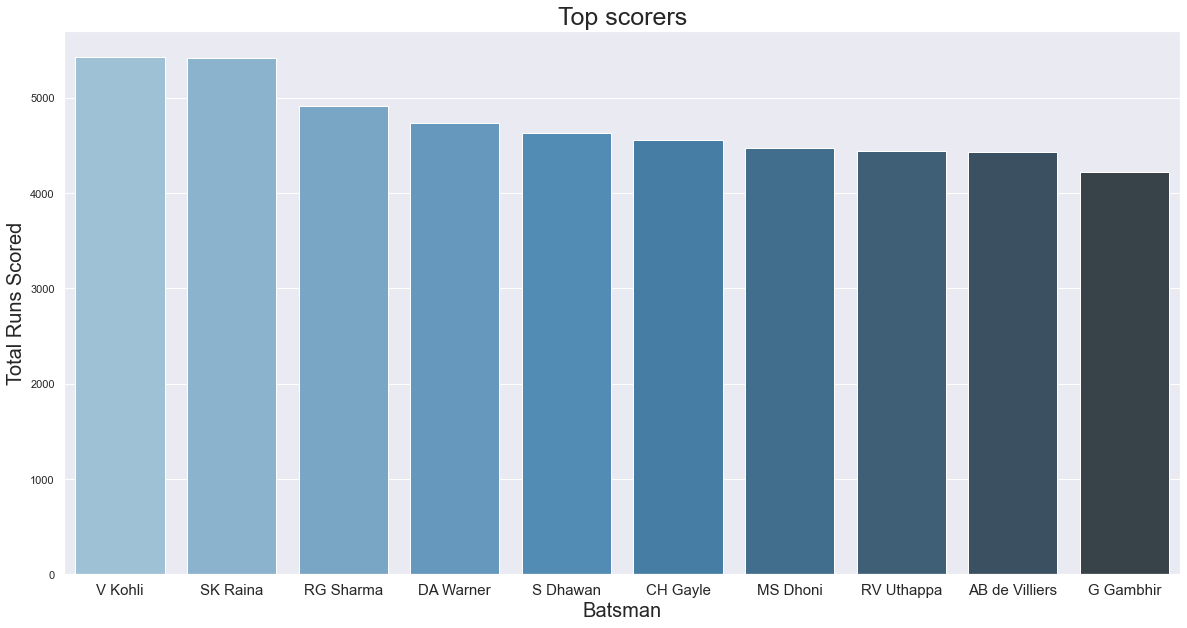

In [135]:
#Plotting top scorers
top_scorers=bd.head(10)
plt.figure(figsize=(20,10))
ax=sns.barplot(top_scorers.batsman,top_scorers['Total Runs Scored'],palette='Blues_d')
plt.xlabel('Batsman',fontsize=20)
plt.ylabel('Total Runs Scored',fontsize=20)
plt.xticks(size=15)
plt.title('Top scorers',fontsize=25)
plt.show()

C:\Users\sairahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


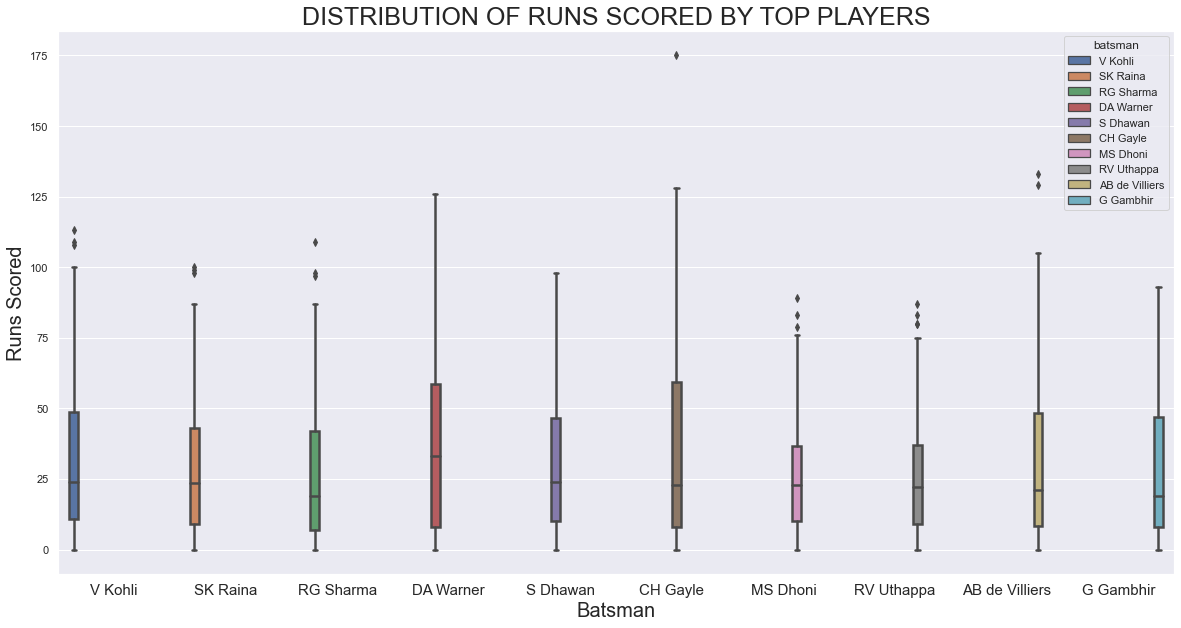

In [138]:
## Analysing spread of scores of top player
top_player=bd[['batsman']][:10]
top_player=top_player.merge(rs,on='batsman')
top_player
plt.figure(figsize=(20,10))
plt.xticks(size=15)
sns.boxplot('batsman','runs_scored',hue='batsman',data=top_player,linewidth=2.5)
plt.xlabel('Batsman',fontsize=20)
plt.title('DISTRIBUTION OF RUNS SCORED BY TOP PLAYERS',fontsize=25)
plt.ylabel('Runs Scored',fontsize=20)
plt.show()


### ANALYSING BOWLERS AND FINDING SUCCESSFUL BOWLERS

In [24]:
#Number of wickets taken by bowler
wt=all_data[(all_data['dismissal_kind']=='caught')| (all_data['dismissal_kind']=='bowled') | (all_data['dismissal_kind']== 'run out') | (all_data['dismissal_kind']== 'lbw') | (all_data['dismissal_kind']== 'caught and bowled') | (all_data['dismissal_kind']==
       'stumped') | (all_data['dismissal_kind']== 'hit wicket')]
nwt=wt.groupby(['id','season','inning','bowling_team','bowler']).agg({'dismissal_kind':'count'})
nwt.columns=['Number of Wickets']
nwt=nwt.reset_index()
nwt

,id,season,inning,bowling_team,bowler,Number of Wickets
0,1,2017,1,Royal Challengers Bangalore,A Choudhary,1
1,1,2017,1,Royal Challengers Bangalore,STR Binny,1
2,1,2017,1,Royal Challengers Bangalore,TS Mills,1
3,1,2017,1,Royal Challengers Bangalore,YS Chahal,1
4,1,2017,2,Sunrisers Hyderabad,A Nehra,2
...,...,...,...,...,...,...
5344,11415,2019,2,Mumbai Indians,HH Pandya,1
5345,11415,2019,2,Mumbai Indians,JJ Bumrah,2
5346,11415,2019,2,Mumbai Indians,KH Pandya,1
5347,11415,2019,2,Mumbai Indians,RD Chahar,1


In [139]:
#Number of overs/balls bowled by bolwer in every match
nb=all_data.groupby(['id','season','inning','bowling_team','bowler']).agg({'ball':'count','batsman_runs':'sum','wide_runs':'sum','noball_runs':'sum'})
nb.columns=['Number of balls bowled','batsman runs','wide runs','noball runs']
nb=nb.reset_index()
nb['total runs conceded']=nb['batsman runs']+nb['wide runs']+nb['noball runs']
nb['overs']=nb['Number of balls bowled']//6+(nb['Number of balls bowled']%6)/10
nb['economy rate']=((nb['batsman runs']+nb['wide runs']+nb['noball runs'])/nb['Number of balls bowled'])*6

In [26]:
new_data=nb.merge(nwt,how='left',on=['id','season','inning','bowling_team','bowler']).fillna(0)
new_data

,id,season,inning,bowling_team,bowler,Number of balls bowled,batsman runs,wide runs,noball runs,total runs conceded,overs,economy rate,Number of Wickets
0,1,2017,1,Royal Challengers Bangalore,A Choudhary,28,51,3,1,55,4.4,11.785714,1.0
1,1,2017,1,Royal Challengers Bangalore,S Aravind,18,36,0,0,36,3.0,12.000000,0.0
2,1,2017,1,Royal Challengers Bangalore,SR Watson,18,41,0,0,41,3.0,13.666667,0.0
3,1,2017,1,Royal Challengers Bangalore,STR Binny,6,10,0,0,10,1.0,10.000000,1.0
4,1,2017,1,Royal Challengers Bangalore,TM Head,6,11,0,0,11,1.0,11.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,11415,2019,2,Mumbai Indians,JJ Bumrah,24,19,0,0,19,4.0,4.750000,2.0
8991,11415,2019,2,Mumbai Indians,KH Pandya,18,39,0,0,39,3.0,13.000000,1.0
8992,11415,2019,2,Mumbai Indians,MJ McClenaghan,26,24,2,0,26,4.2,6.000000,0.0
8993,11415,2019,2,Mumbai Indians,RD Chahar,24,14,0,0,14,4.0,3.500000,1.0


In [27]:
#Number of wicket taken seasonwise
nwt_seasonwise=new_data.groupby(['season','bowler']).agg({'total runs conceded' : 'sum','Number of balls bowled':'sum','Number of Wickets':'sum'})
nwt_seasonwise=nwt_seasonwise.reset_index()
nwt_seasonwise['economy rate']=(nwt_seasonwise['total runs conceded']/nwt_seasonwise['Number of balls bowled'])*6

In [146]:
# Top wicket taker every season
tw=pd.DataFrame(nwt_seasonwise.groupby(['season'])['Number of Wickets'].max().reset_index())
tw
twt=tw.merge(nwt_seasonwise,how='inner',left_on=['season','Number of Wickets'],right_on=['season','Number of Wickets'])
twt[['season','bowler','Number of Wickets']]
twt

,season,Number of Wickets,bowler,total runs conceded,Number of balls bowled,economy rate
0,2008,24.0,Sohail Tanvir,266,265,6.022642
1,2009,26.0,RP Singh,417,382,6.549738
2,2010,22.0,PP Ojha,429,360,7.150000
3,2011,30.0,SL Malinga,375,397,5.667506
4,2012,30.0,M Morkel,453,389,6.987147
5,2013,34.0,DJ Bravo,497,392,7.607143
6,2014,26.0,MM Sharma,452,324,8.370370
7,2015,28.0,DJ Bravo,426,324,7.888889
8,2016,24.0,B Kumar,490,414,7.101449
9,2017,28.0,B Kumar,369,324,6.833333


In [29]:
#total number of wickets taken
total_wickets=new_data.groupby(['bowler']).agg({'total runs conceded' : 'sum','Number of balls bowled':'sum','Number of Wickets':'sum'})
total_wickets=total_wickets.reset_index()
total_wickets['overs']=total_wickets['Number of balls bowled']//6+(total_wickets['Number of balls bowled']%6)/10
total_wickets['economy rate']=(total_wickets['total runs conceded']/total_wickets['Number of balls bowled'])*6
total_wickets.set_index('bowler',inplace=True)

In [30]:
#Number of times a bowler bowled in super over

so_bowler=all_data[all_data['is_super_over']==1]
nso_bowler=so_bowler.groupby(['bowler']).agg({'bowler' : 'count'})
nso_bowler.columns=['Number of times bowled in super over']
nso_bowler=nso_bowler.reset_index()
nso_bowler=nso_bowler.sort_values(by=['Number of times bowled in super over'],ascending=False)
nso_bowler.head(20)
nso_bowler.set_index('bowler',inplace=True)

In [31]:
#Highest wickets taken by a bowler
hw=new_data.groupby(['bowler'])['Number of Wickets'].max().reset_index(name='Highest Wickets taken')
hw.set_index('bowler',inplace=True)

In [32]:
#Number of games played
gp_bowler=new_data.groupby(['bowler'])['id'].count().reset_index(name='Number of matches played')
gp_bowler.set_index('bowler',inplace=True)

### BOWLERS DATA

In [147]:
df_bowler=[gp_bowler,hw]
bowler_data = total_wickets.join(df_bowler,how='left')
bowler_data=bowler_data.join(nso_bowler,how='left').fillna(0)
bowler_data=bowler_data.sort_values(by=['Number of Wickets'],ascending=False)
bowler_data.head(10)

,total runs conceded,Number of balls bowled,Number of Wickets,overs,economy rate,Number of matches played,Highest Wickets taken,Number of times bowled in super over
bowler,,,,,,,,
SL Malinga,3390,2974,188.0,495.4,6.839274,122,5.0,0.0
DJ Bravo,3662,2711,168.0,451.5,8.104758,131,4.0,0.0
A Mishra,3804,3172,165.0,528.4,7.195460,147,5.0,0.0
Harbhajan Singh,3979,3451,161.0,575.1,6.917995,157,5.0,0.0
PP Chawla,4086,3157,156.0,526.1,7.765600,156,4.0,0.0
B Kumar,3185,2707,141.0,451.1,7.059475,117,5.0,0.0
R Ashwin,3337,3016,138.0,502.4,6.638594,136,5.0,0.0
SP Narine,2884,2600,137.0,433.2,6.655385,110,5.0,6.0
UT Yadav,3550,2605,136.0,434.1,8.176583,119,4.0,6.0


In [157]:
bowler_data=bowler_data.reset_index()

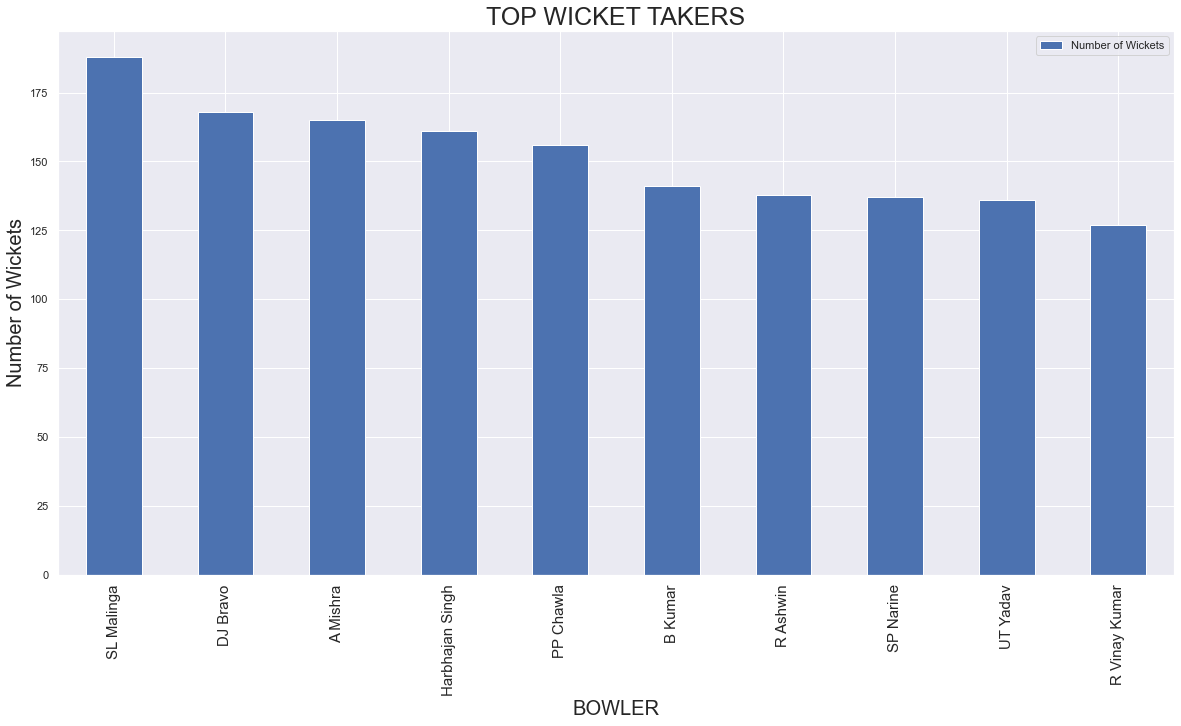

In [168]:
bowler_data.sort_values(by='Number of Wickets',ascending=False).head(10).plot(x='bowler',y='Number of Wickets',kind='bar',figsize=(20,10))
plt.xlabel('BOWLER',fontsize=20)
plt.ylabel('Number of Wickets',fontsize=20)
plt.title('TOP WICKET TAKERS',fontsize=25)
plt.xticks(size=15)
plt.show()

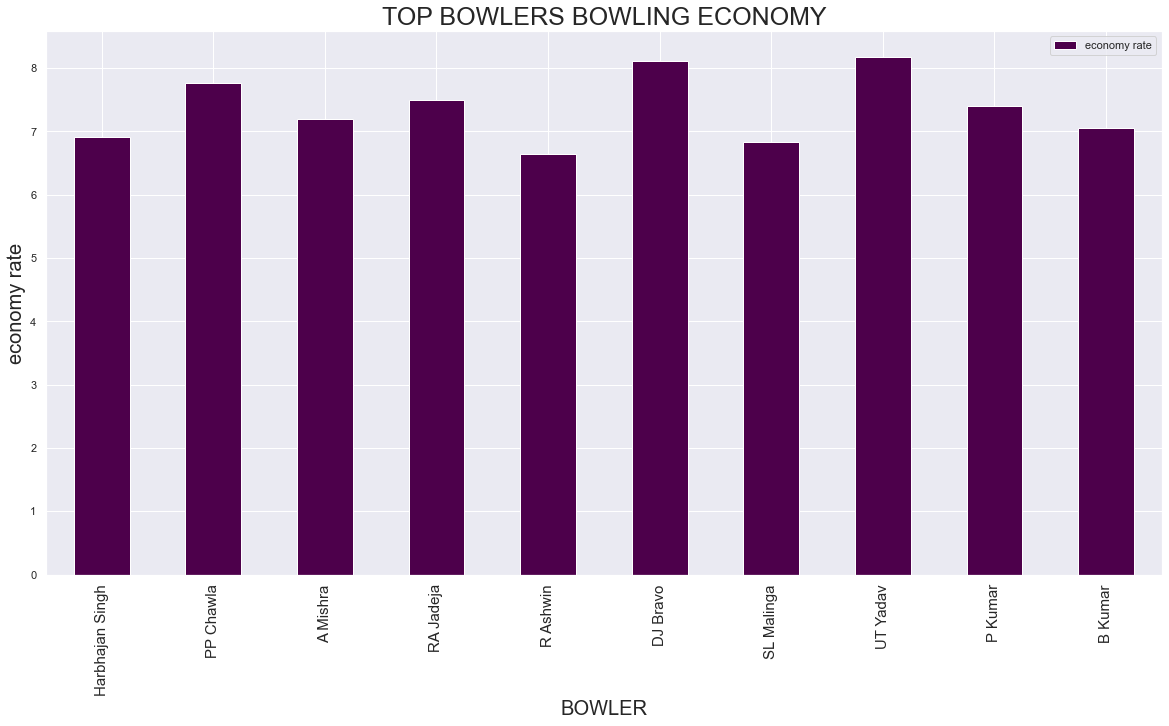

In [177]:
bowler_data.sort_values(by=['Number of matches played','Number of Wickets'],ascending=False).head(10).plot(x='bowler',y='economy rate',kind='bar',figsize=(20,10),cmap='BuPu_r')
plt.xlabel('BOWLER',fontsize=20)
plt.ylabel('economy rate',fontsize=20)
plt.title('TOP BOWLERS BOWLING ECONOMY',fontsize=25)
plt.xticks(size=15)
plt.show()

### FINDING SUCCESSFUL TEAMS

In [34]:
#Number of wins
wins=matches.groupby(['winner'])['winner'].count().reset_index(name='Number of matches won').sort_values(by='Number of matches won',ascending=False)
wins.columns=['Team','Number of matches won']
wins.set_index('Team',inplace=True)

In [35]:
#Number of tie matches
a=matches[matches.result=='tie']
a1=a.groupby(['team1'])['team1'].count().reset_index(name='Num_tie_matches')
a2=a.groupby(['team2'])['team2'].count().reset_index(name='Num_tie_matches')
tie_matches=a1.merge(a2,how='outer',left_on='team1',right_on='team2')
tie_matches[['Num_tie_matches_y','Num_tie_matches_x']]=tie_matches[['Num_tie_matches_y','Num_tie_matches_x']].fillna(0)
tie_matches['team1'].fillna(tie_matches.team2,inplace=True)
tie_matches['Number of tied matches']=tie_matches['Num_tie_matches_x']+tie_matches['Num_tie_matches_y']
tie_matches=tie_matches[['team1','Number of tied matches']]
tie_matches.columns=['Team','Number of tied matches']

In [36]:
#Number of matches tied and won, tied and lost data of teams
Tie_won=a.groupby(['winner'])['winner'].count().reset_index(name='Number of tie Matches won')
Tie=tie_matches.merge(Tie_won,how='left',left_on='Team',right_on='winner')
Tie=Tie[['Team','Number of tied matches','Number of tie Matches won']]
Tie['Number of tie Matches won']=Tie['Number of tie Matches won'].fillna(0)
Tie['Tie and lost']=Tie['Number of tied matches']-Tie['Number of tie Matches won']
Tie=Tie[['Team','Number of tie Matches won','Tie and lost']]
Tie.columns=['Team','Tie and won','Tie and lost']
Tie.set_index('Team',inplace=True)

In [37]:
#Number of matches played
team1=matches.groupby(['team1'])['id'].count().reset_index()
team2=matches.groupby(['team2'])['id'].count().reset_index()
nmp=team1.merge(team2,how='inner',left_on='team1',right_on='team2')
nmp['Number of Matches played']=nmp['id_x']+nmp['id_y']
num_of_matches_played=nmp[['team1','Number of Matches played']]
num_of_matches_played.columns=['Team','Number of Matches played']
num_of_matches_played.set_index('Team',inplace=True)

In [38]:
#Number of seasons won
f=matches.groupby(['season'])['winner'].last().reset_index(name='Winner of the season')
f=f.groupby(['Winner of the season'])['Winner of the season'].count().reset_index(name='Number of seasons won')
f.columns=['Team','Number of seasons won']
f.set_index('Team',inplace=True)

### Teams data

In [56]:
teams=[num_of_matches_played,f,wins,Tie]
team_data=pd.concat(teams,axis=1).fillna(0)
team_data=team_data.rename(columns={'Number of matches won' : 'Total Number of matches won'})
team_data['Total Number of Matches lost']=team_data['Number of Matches played']-team_data['Total Number of matches won']-team_data['Tie and lost']
team_data=team_data.astype({'Number of seasons won':'int64'})
team_data['win%']=(team_data['Total Number of matches won']/team_data['Number of Matches played'])*100
team_data
team_data.sort_values(by=['Number of seasons won','win%'],ascending=False)

,Number of Matches played,Number of seasons won,Total Number of matches won,Tie and won,Tie and lost,Total Number of Matches lost,win%
Mumbai Indians,187,4,109,2.0,0.0,78.0,58.288770
Chennai Super Kings,164,3,100,0.0,1.0,63.0,60.975610
Kolkata Knight Riders,178,2,92,0.0,3.0,83.0,51.685393
Sunrisers Hyderabad,108,1,58,1.0,1.0,49.0,53.703704
Rajasthan Royals,147,1,75,2.0,1.0,71.0,51.020408
Deccan Chargers,75,1,29,0.0,0.0,46.0,38.666667
Delhi Capitals,16,0,10,1.0,0.0,6.0,62.500000
Rising Pune Supergiant,16,0,10,0.0,0.0,6.0,62.500000
Royal Challengers Bangalore,180,0,84,1.0,1.0,95.0,46.666667
Kings XI Punjab,176,0,82,2.0,0.0,94.0,46.590909


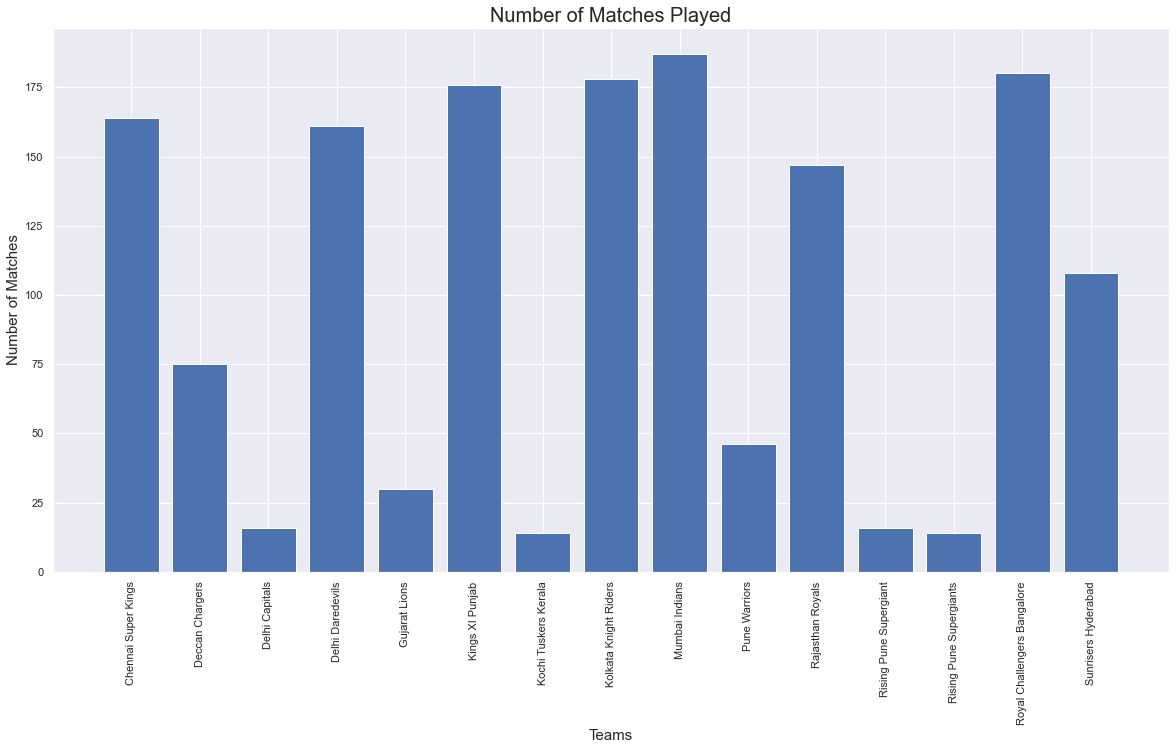

In [176]:
plt.figure(figsize=(20,10))
plt.bar(team_data.index,team_data['Number of Matches played'])
plt.xticks(rotation=90)
plt.title('Number of Matches Played',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Number of Matches',fontsize=15)
plt.show()

### ANALYSISNG FACTORS AFFECTING WIN/LOSS

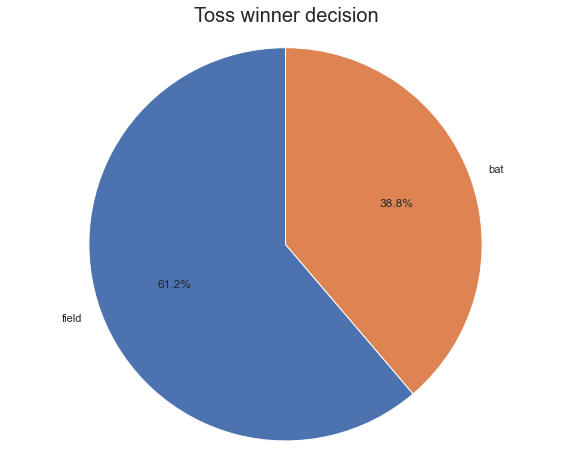

In [196]:
toss_dec=matches.toss_decision.value_counts()
labels=toss_dec.index
sizes = toss_dec.values
plt.figure(figsize = (10,8))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Toss winner decision',fontsize=20)
plt.axis('equal')
plt.show()

In [57]:
matches['won_by']=np.where(matches['win_by_runs']>0,'bat','field')

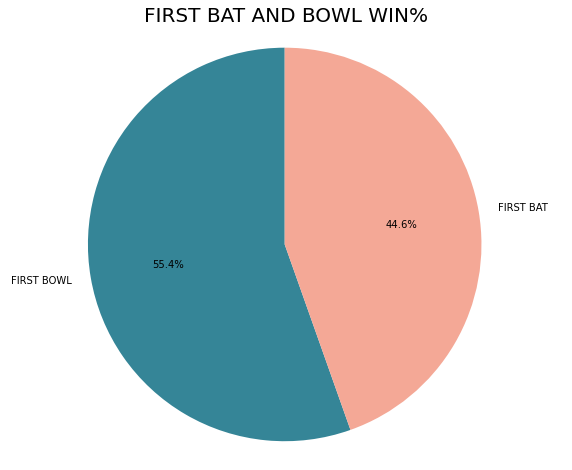

In [58]:
win_by=matches.won_by.value_counts()
labels=['FIRST BOWL','FIRST BAT']
sizes = win_by.values
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels,autopct='%1.1f%%',startangle=90,colors=['#358597','#F4A896'])
plt.title('FIRST BAT AND BOWL WIN%',fontsize=20)
plt.axis('equal')
plt.show()

In [59]:
matches['Toss_win']=np.where(matches.toss_winner==matches.winner,'WIN','LOSS')

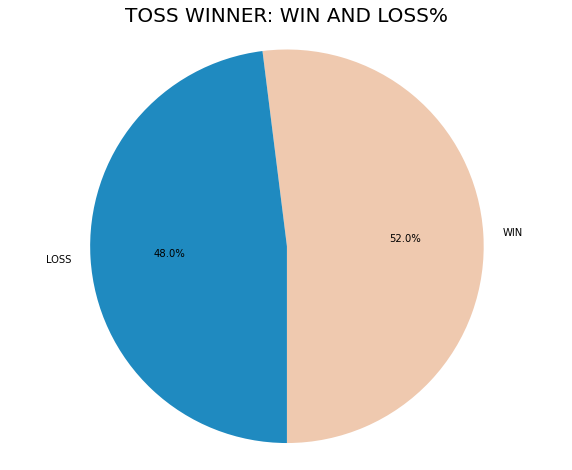

In [60]:
Toss_win=matches.Toss_win.value_counts()
labels=np.array(Toss_win.index)
sizes = Toss_win.values
colors=['#EFC9AF','#1F8AC0']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels,autopct='%1.1f%%',startangle=270,colors=colors)
plt.title('TOSS WINNER: WIN AND LOSS%',fontsize=20)
plt.axis('equal')
plt.show()

In [61]:
#Macthes when dl is applied
dl=matches[matches.dl_applied==1]

In [62]:
dl['Inn']=np.where(dl.win_by_runs>0,'First Bat','First Bowl')

<ipython-input-62-dc2595116c37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dl['Inn']=np.where(dl.win_by_runs>0,'First Bat','First Bowl')


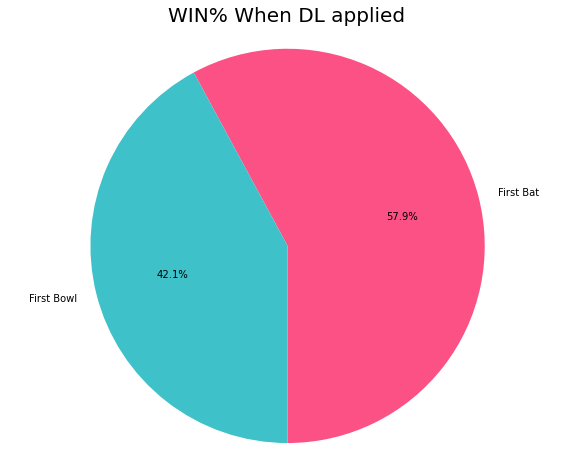

In [63]:
inn=dl.Inn.value_counts()
labels=np.array(inn.index)
sizes = inn.values
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels,autopct='%1.1f%%',startangle=270,colors=['#FC5185','#3FC1C9'])
plt.title('WIN% When DL applied',fontsize=20)
plt.axis('equal')
plt.show()

C:\Users\sairahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

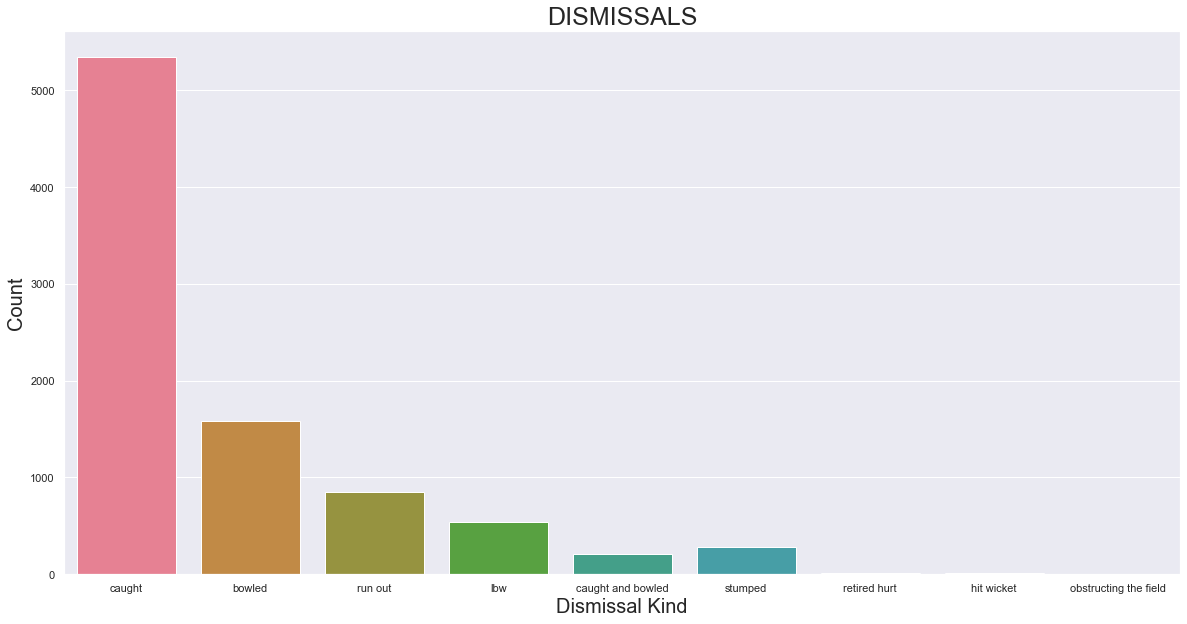

In [64]:
#dismissal kind analysis
sns.set_theme(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(deliveries.dismissal_kind,palette='husl')
plt.title('DISMISSALS',fontsize=25)
plt.xlabel('Dismissal Kind',fontsize=20)
plt.ylabel('Count',fontsize=20)

## Key Take aways:

 ## Batsman
- Top scorers in IPL from 2008 to 2019 are V kohli, SK Raina, RG sharma, S Dhawan, DA warner.
- Players with highest strike rate are AB de villiers,YK patham SK raina, MS Dhoni.
- Most centuries scored by CH Gayle, V Kohli, SR Watson.
- Most Half centuries scored by DA Warner, V Kohli, SK Raina.
- Most sixes hit by players CH Gayle, AB de villiers, MS Dhoni.
- Most fours hit by players S Dhawan, SK Raina, G Gambhir,V kohli.
- The game changers and maximum number of player of match title is won by players Chris Gayle,AB de villiers, RG Sharma, DA warner.
## Bowlers
- Top wicket takers in all seasons from 2008-2019 are SL malinga, DJ bravo, A mishra.
- The most experienced and with low economy rate players are Harbhajan singh,PP chawla, A mishra.
## Teams
- Highest Number of seasons won by Mumbai Indians(4 titles), Chennai Super kings(3 titles) and Kolkata Knight Riders(2 titles).
- Delhi Captials and Rising Pune Supergiant has highest win percentage but played less number of matches in the span of 2008-2019.
- Chennai Super Kings and Mumbai Indians has next highest win percentage.
- Mumbai Indians and Kolkata Knight Riders played maximum number of matches.
## Factors Contributing win and loss of match
- The captians of the team who won toss mostly decided to bowl first.
- The teams which won the toss mostly won the match too.
- The teams which played second innings mostly won the match.
- When there are external factors affecting matches i.e. when dl applied teams who played first innings has more win percentage than teams who played second innings. 

## Conclusion :
- Top 10 successful batsman so far are V kohli,S Dhawan, AB de villiars, SK Raina, RG sharma, DA Warner,CH Gayle, MS Dhoni, RV Uthappa, G Gambhir.
- Top 10 successful bowlers are SL Malinga, DJ Bravo, A mishra, Harbhajan Singh, PP Chawla, B Kumar, R ashwin, SP Narine, UT Yadav, R Vinay kumar.
- Most successful teams are Mumbai Indians, Chennai Super Kings, and Kolkata Knight Riders.
- Successful teams and players are most suitable for a company to endorse for its products. 
    

> THANK YOU!